Checking to see if there is any effect if all rays are vertical (just debugging to make sure all effects are DUE TO the angle difference AND NOTHING ELSE)

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import * 
from random import uniform
import random
import pickle
import math
import time

In [4]:
'''Simulation of interference of probability function of a single photon. 500 rays with initial phase of zero from a single source point, random launch points, and power is summed before squared. To show Chamberlain loss (large etendue) '''
def RunRays_Prob_VERTICAL(Lamd,Nsize,spo):
    n = 500
    r = 0
    thetG = [0,0,0]
    #Rays = makeraysVERTICAL(spo,r,n) 
    Rays = makeraysVERTICAL_Zero(spo,r,n) #lim is solid angle wanted
    #jx,jy = gridlines(7.9375,[160.375,-113],200) #these are now the PIXELS
    #Pix = MakePixels(jx,jy) #center of each pixel
    Ij = []
    Delay = []
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        #Overlap = gaussoverlap(OutRays[0],OutRays[5],3.3) #two paths that hit two different spots 
        #for j in range(len(Pix)): #per PIXEL
        for j in range(1):
            Ex4i = 0 #adding PER PIXEL from parts of RAYS in this PIXEL
            Ey4i = 0 #THIS IS WHERE THEY WILL INTERFERE
            for i in range(len(OutRays)): #per ray IN THIS PIXEL
                I = OutRays[i][1]
                thet = OutRays[i][0]
                phase = np.exp(1j*(OutRays[i][4]*2*np.pi/Lamd)) #factor of 2??
                Ex1 = np.sqrt(I)*np.cos(thet)
                Ey1 = np.sqrt(I)*np.sin(thet)
                Ex = Ex1*phase
                Ey = Ey1*phase
                #doing summation over entire detector
                #sig,mux,muy = MakeGaussian(OutRays[i],Lamd)
                #Gr = Airygaussian3dNORM(Pix[j][0],Pix[j][1],sig,mux,muy)
                Gr = 1
                Ex4i = Ex4i + Gr*Ex
                Ey4i = Ey4i + Gr*Ey
            PTot = PTot + (Ex4i*Ex4i.conjugate()).real + (Ey4i*Ey4i.conjugate()).real
        Delay.append(y*0.95630475596*4)
        Ij.append(PTot)
    return Delay,Ij



In [5]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')

Lamd =2.089
Timei = time.time()
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.]

#lim = np.pi/6 #30 degrees
#lim= np.pi/9 #20 degrees
#lim = np.pi/18 #10 degrees
# all rays given vertical launch angle
Delay1, Ij1 = RunRays_Prob_VERTICAL(Lamd,Nsize,spo)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

began:  2019-05-30 14:57:30
CURRENTLY RUNNING...
COMPLETED
total time: ~ 319.1066591699918 mins


In [6]:
with open("Ij_Chamb_144_Vert_500_"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Ij1,F)
with open("Delay_Chamb_144_Vert_500_"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Delay1,F)

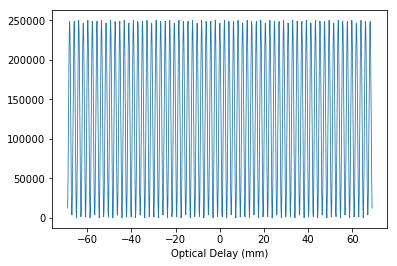

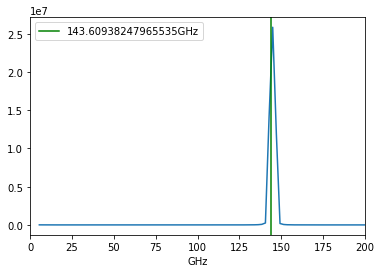

In [7]:
d1 = Ij1
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay1,Ij1,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 

pl.plot(300*f[3:],u[3:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()
#with one ray